
Column names: ['Freq [GHz]', 'S12 Mag', 'S13 Mag', 'S14 Mag', 'S23 Mag', 'S24 Mag', 'S34 Mag', 'S12 Phase', 'S13 Phase', 'S14 Phase', 'S23 Phase', 'S24 Phase', 'S34 Phase', 'S11 Mag', 'S22 Mag', 'S33 Mag', 'S44 Mag', 'S11 Phase', 'S22 Phase', 'S33 Phase', 'S44 Phase', 'Size']
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Freq [GHz]  2002 non-null   float64
 1   S12 Mag     2002 non-null   float64
 2   S13 Mag     2002 non-null   float64
 3   S14 Mag     2002 non-null   float64
 4   S23 Mag     2002 non-null   float64
 5   S24 Mag     2002 non-null   float64
 6   S34 Mag     2002 non-null   float64
 7   S12 Phase   2002 non-null   float64
 8   S13 Phase   2002 non-null   float64
 9   S14 Phase   2002 non-null   float64
 10  S23 Phase   2002 non-null   float64
 11  S24 Phase   2002 non-null   float64
 12  S34 Phase   2002 n

<Figure size 1500x1000 with 0 Axes>

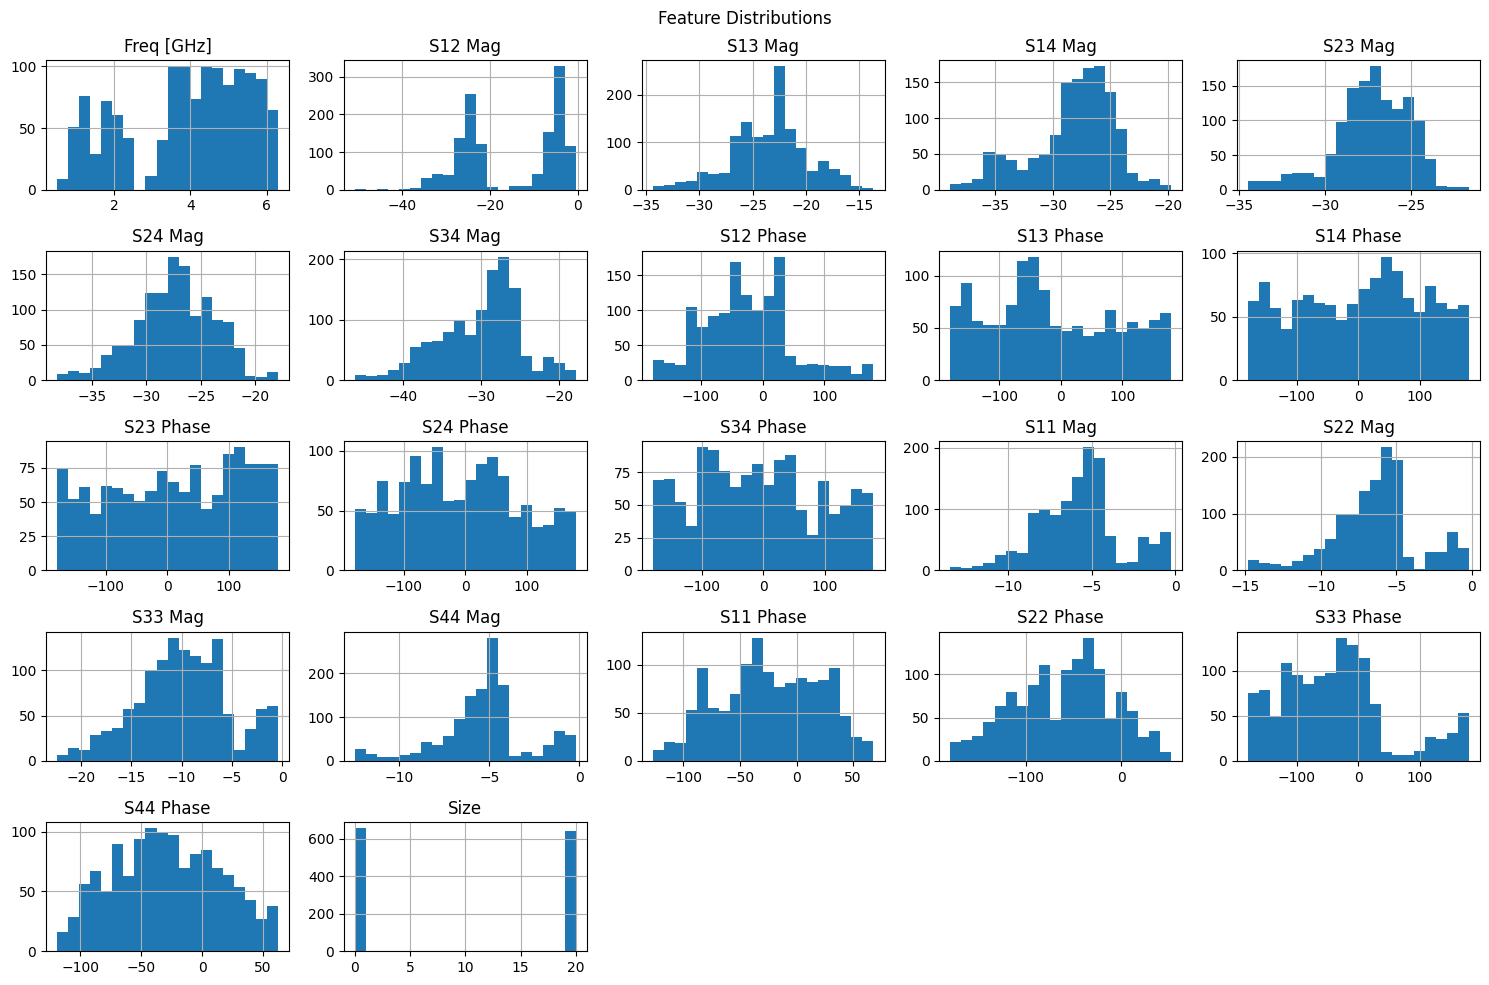

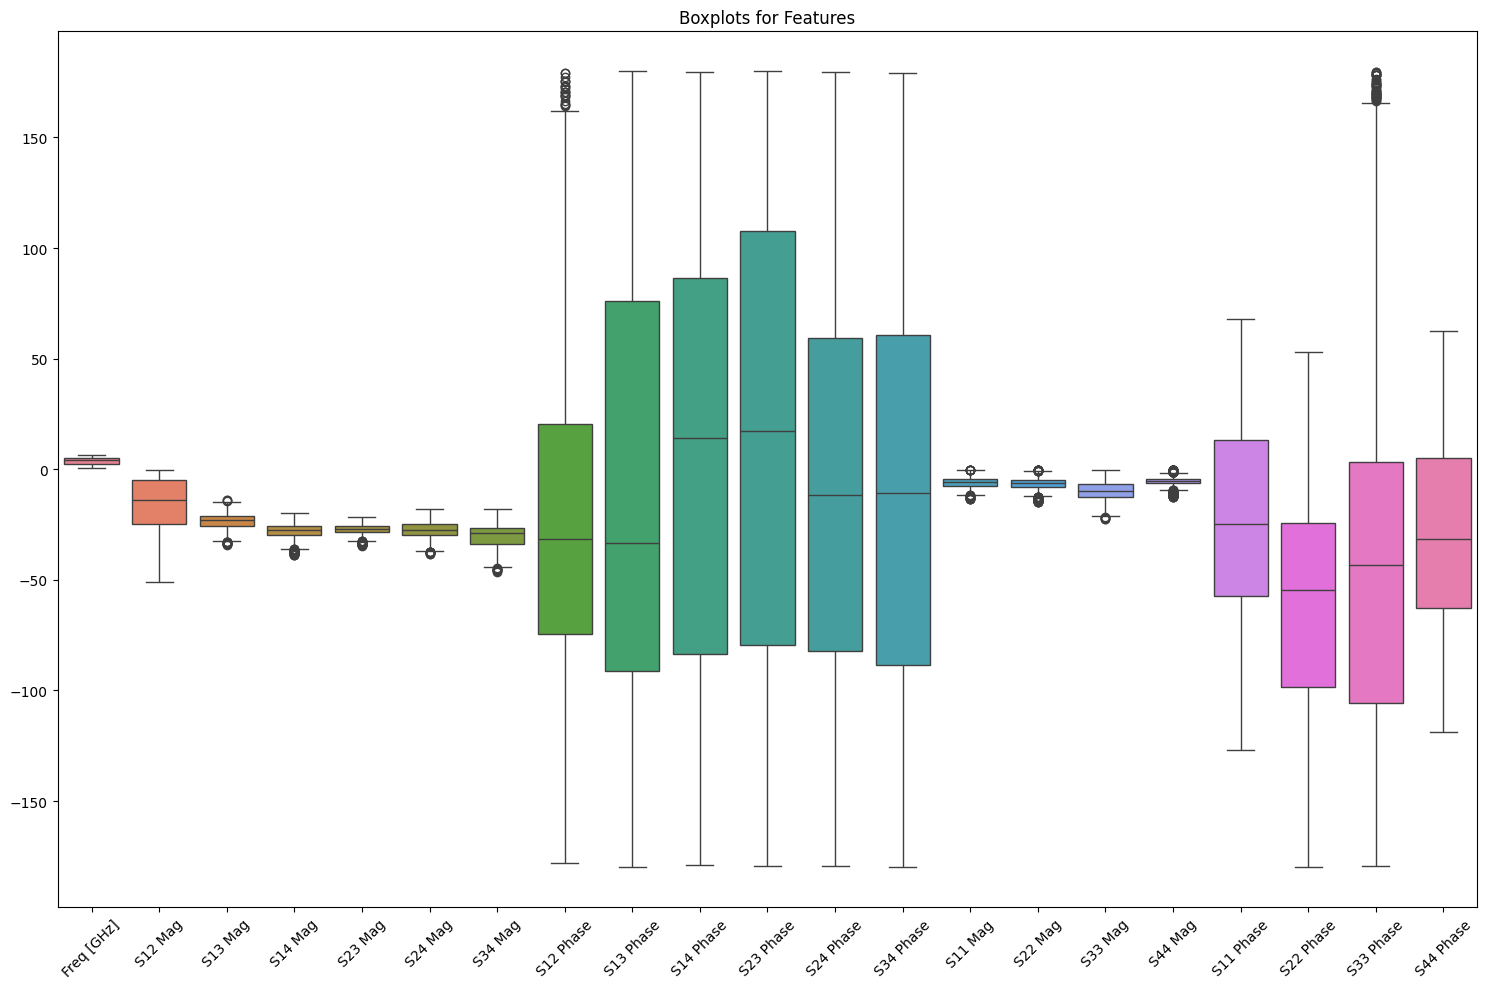

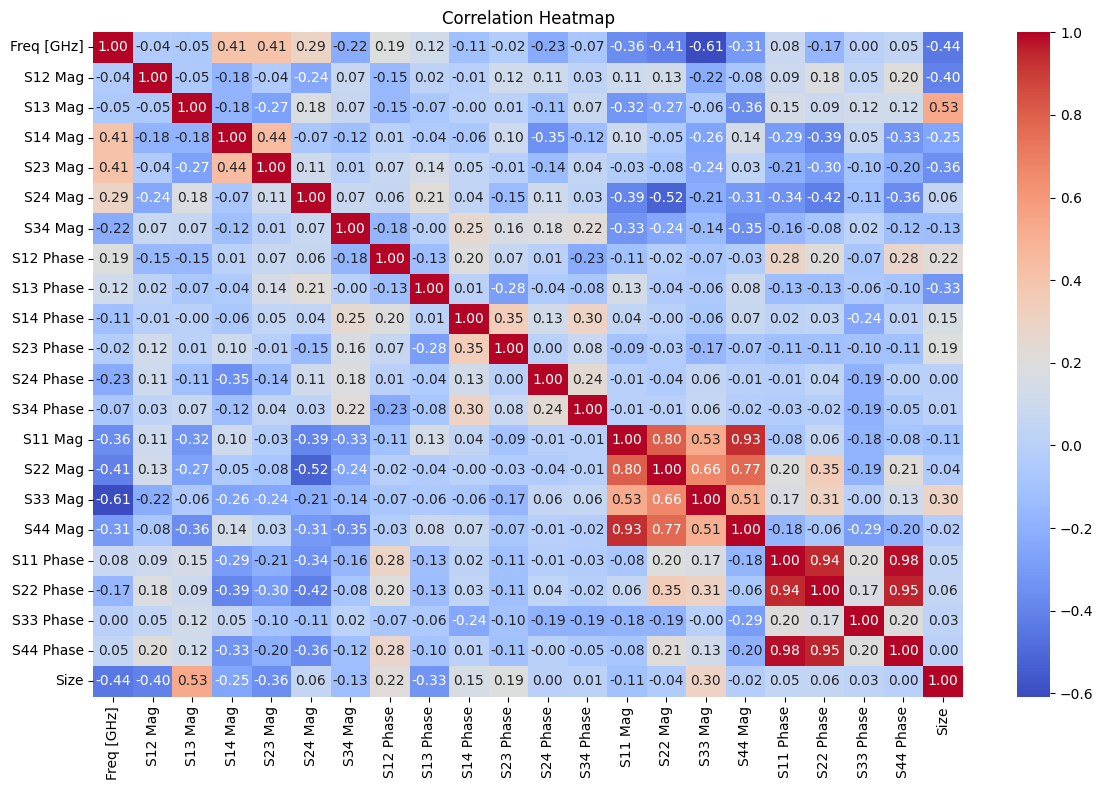


Preprocessed dataset saved as 'Processed_Sensor_Data.csv'

Final dataset shape: (1297, 22)


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('Sensor Data.csv')

# Remove the unnamed column
data = data.drop('Unnamed: 21', axis=1)

# Print column names
print("\nColumn names:", data.columns.tolist())

# 1. Data Analysis
print("Dataset Overview:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# 2. Check for Null Values
print("\nNull Values in Each Column:")
null_values = data.isnull().sum()
print(null_values)

# 3. Handle Null Values
if data.isnull().sum().sum() > 0:
    data = data.fillna(data.mean())
    print("Null values have been handled.")

# 4. Check and Remove Duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates removed.")

# 5. Detect and Handle Outliers using IQR method
def remove_outliers(df):
    df_clean = df.copy()
    for column in df.columns[:-1]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    return df_clean

data = remove_outliers(data)
print("\nOutliers have been handled.")

# 6. Visualize Feature Distributions
plt.figure(figsize=(15, 10))
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

# 7. Visualize Outliers using Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.drop('Size', axis=1))
plt.xticks(rotation=45)
plt.title('Boxplots for Features')
plt.tight_layout()
plt.show()

# 8. Normalize Features
scaler = MinMaxScaler()

# Separate features and target
X = data.drop('Size', axis=1)
y = data['Size']

# Normalize features
X_normalized = scaler.fit_transform(X)
data_normalized = pd.DataFrame(X_normalized, columns=X.columns)
data_normalized['Size'] = y

# 9. Create Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data_normalized.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

data_normalized.to_csv('Processed_Sensor_Data.csv', index=False)
print("\nPreprocessed dataset saved as 'Processed_Sensor_Data.csv'")

# 10. Print Final Dataset Shape
print("\nFinal dataset shape:", data_normalized.shape)